In [2]:
# Installing specific versions of packages
!pip install sdv==1.6.0
!pip install rdt==1.9.0
!pip install dp_cgans==0.0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 951.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
 

In [11]:
from dp_cgans import DP_CGAN
import pandas as pd
import math
import joblib
import torch

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# ENTER THE DATASET NUMBER THAT YOU WANT TO TRAIN THE MODEL WITH
dataset_number = 5

In [6]:
training_data = pd.read_csv(f"/content/gdrive/MyDrive/Data/Final Dataset/data_mimic/chapter_{dataset_number}.csv")

# Everyone modify this to run on your accounts
# training_data = pd.read_csv(f"PATH TO YOUR DRIVE/chapter_{dataset_number}.csv")

training_data.head(-1)

,gender,age,ethnicity,admission_type,primary_icd9_code,primary_icd9_label,num_of_icd9_codes,hospital_expire_flag,hospital_stay_hours,BMI,Hemoglobine,Hematocrit,WBC
0,M,32,UNKNOWN/NOT SPECIFIED,EMERGENCY,30011,"Neurotic disorders, personality disorders, and...",7,False,223.0,27.053990,12.194726,35.718110,6.777135
1,F,81,UNKNOWN/NOT SPECIFIED,EMERGENCY,30501,"Neurotic disorders, personality disorders, and...",9,False,284.0,27.053990,12.194726,35.718110,6.777135
2,M,42,WHITE,EMERGENCY,29181,Psychosis,4,False,231.0,27.053990,12.194726,35.718110,6.777135
3,M,53,WHITE,EMERGENCY,2910,Psychosis,9,False,630.0,27.053990,12.194726,35.718110,6.777135
4,M,29,HISPANIC OR LATINO,EMERGENCY,2910,Psychosis,11,False,138.0,27.053990,12.194726,35.718110,6.777135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,M,61,WHITE,EMERGENCY,29181,Psychosis,10,False,56.0,27.053990,12.300000,36.366667,9.533333
496,F,38,BLACK/AFRICAN AMERICAN,EMERGENCY,2910,Psychosis,9,False,43.0,19.562761,8.400000,24.900000,3.400000
497,F,48,WHITE,EMERGENCY,29181,Psychosis,15,False,49.0,20.531888,10.900000,32.600000,6.800000
498,M,40,WHITE,EMERGENCY,29181,Psychosis,7,False,33.0,26.541618,13.900000,39.900000,8.900000


In [7]:
training_data.drop(columns=['primary_icd9_code'], inplace=True)
training_data.head()

,gender,age,ethnicity,admission_type,primary_icd9_label,num_of_icd9_codes,hospital_expire_flag,hospital_stay_hours,BMI,Hemoglobine,Hematocrit,WBC
0,M,32,UNKNOWN/NOT SPECIFIED,EMERGENCY,"Neurotic disorders, personality disorders, and...",7,False,223.0,27.05399,12.194726,35.71811,6.777135
1,F,81,UNKNOWN/NOT SPECIFIED,EMERGENCY,"Neurotic disorders, personality disorders, and...",9,False,284.0,27.05399,12.194726,35.71811,6.777135
2,M,42,WHITE,EMERGENCY,Psychosis,4,False,231.0,27.05399,12.194726,35.71811,6.777135
3,M,53,WHITE,EMERGENCY,Psychosis,9,False,630.0,27.05399,12.194726,35.71811,6.777135
4,M,29,HISPANIC OR LATINO,EMERGENCY,Psychosis,11,False,138.0,27.05399,12.194726,35.71811,6.777135


In [8]:
num_of_rows = training_data.shape[0]

In [9]:
def closest_even_number(n):
    # Check if the number is already even
    if n % 2 == 0:
        return n
    else:
        # If odd, return the closest even number
        if n % 2 == 1:
            return n - 1

In [ ]:
num_epochs = 500
batch_size = closest_even_number(int(num_of_rows/10))

In [ ]:
model = DP_CGAN(
   epochs=num_epochs,
   batch_size=batch_size,
   cuda = True,
   log_frequency=True,
   verbose=True,
   generator_dim=(128, 128, 128),
   discriminator_dim=(128, 128, 128),
   generator_lr=2e-4,
   discriminator_lr=2e-4,
   discriminator_steps=1,
   private=False,
)

In [ ]:
print("Start training model")
model.fit(training_data)
model.save(f"/content/gdrive/MyDrive/Notebooks/test data/generated data/generator_chapter_{dataset_number}.pkl")

# Everyone modify this to run on your accounts
# model.save(f"PATH TO YOUR DRIVE/generator_chapter_{dataset_number}.pkl")


Start training model


Gen. (-3.64) | Discrim. (0.86):   3%|▎         | 29/1000 [10:59<6:14:40, 23.15s/it]

In [14]:
model = joblib.load(f"/content/gdrive/MyDrive/Notebooks/test data/generated data/generator_chapter_{dataset_number}.pkl")
# model = torch.load(f"/content/gdrive/MyDrive/Notebooks/test data/generated data/generator_chapter_{dataset_number}.pkl", map_location=torch.device('cpu'))

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
# Generate new synthetic rows
syn_data = model.sample(num_of_rows)
syn_data.head(-1)

,gender,age,ethnicity,admission_type,primary_icd9_label,num_of_icd9_codes,hospital_expire_flag,hospital_stay_hours,BMI,Hemoglobine,Hematocrit,WBC
0,M,80,WHITE,EMERGENCY,Psychosis,14,False,112.538384,28.257163,12.395519,36.321296,7.010767
1,M,52,WHITE,EMERGENCY,Psychosis,13,False,187.123841,27.018987,16.586123,35.588016,9.976912
2,M,30,WHITE,EMERGENCY,Psychosis,6,False,134.108363,28.084484,12.462210,36.072204,7.048511
3,M,37,WHITE,EMERGENCY,"Neurotic disorders, personality disorders, and...",0,False,189.019532,27.195959,15.293977,35.215381,7.648635
4,M,68,OTHER,EMERGENCY,"Neurotic disorders, personality disorders, and...",6,False,-30.998901,27.229860,15.266497,35.579985,5.956644
...,...,...,...,...,...,...,...,...,...,...,...,...
495,M,40,OTHER,EMERGENCY,Psychosis,11,False,374.090620,27.660383,12.052713,36.531791,7.213932
496,M,39,WHITE,EMERGENCY,Psychosis,18,False,146.967616,26.466508,12.367096,35.095733,6.994014
497,M,83,WHITE,EMERGENCY,Psychosis,16,False,488.219615,27.532823,12.395227,47.957620,6.700253
498,M,38,WHITE,EMERGENCY,"Neurotic disorders, personality disorders, and...",14,False,114.465327,27.413477,12.405241,35.188810,7.936384


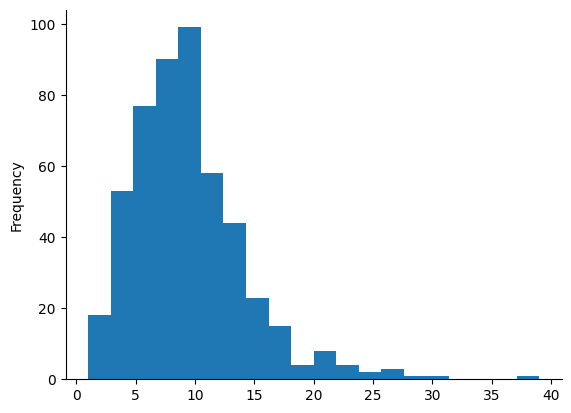

In [ ]:
from matplotlib import pyplot as plt
training_data['num_of_icd9_codes'].plot(kind='hist', bins=20)
plt.gca().spines[['top', 'right',]].set_visible(False)

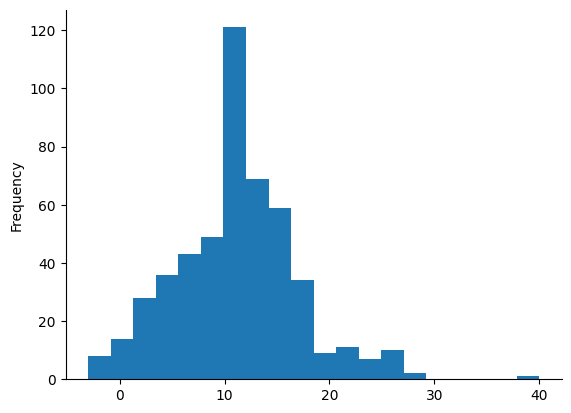

In [ ]:
from matplotlib import pyplot as plt
syn_data['num_of_icd9_codes'].plot(kind='hist', bins=20)
plt.gca().spines[['top', 'right',]].set_visible(False)

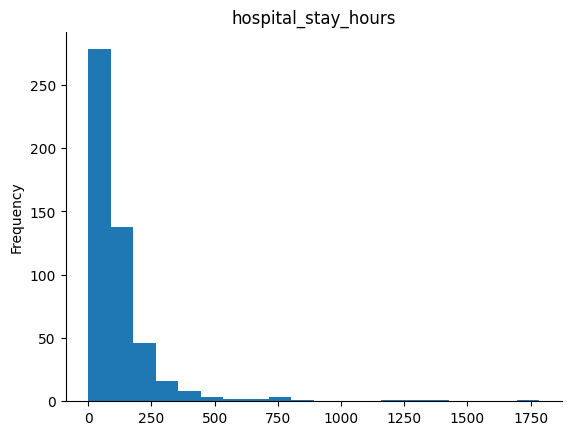

In [ ]:
from matplotlib import pyplot as plt
training_data['hospital_stay_hours'].plot(kind='hist', bins=20, title='hospital_stay_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

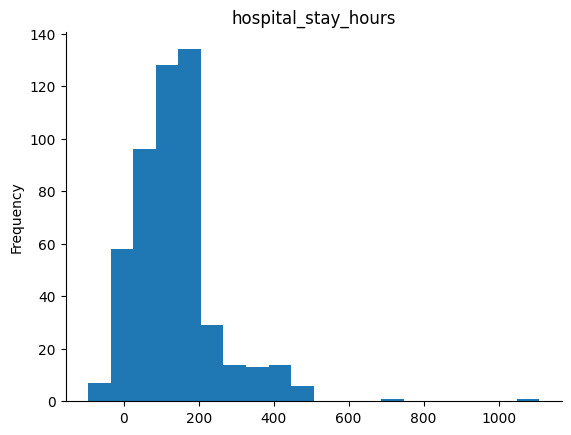

In [ ]:
from matplotlib import pyplot as plt
syn_data['hospital_stay_hours'].plot(kind='hist', bins=20, title='hospital_stay_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
syn_data.to_csv(f"/content/gdrive/MyDrive/Notebooks/test data/generated data/syn_data_chapter_{dataset_number}.csv")

# Everyone modify this to run on your accounts
# syn_data.to_csv(f"PATH TO YOUR DRIVE/syn_data_chapter_{dataset_number}.csv")
